# Ensemble sifting
Here i have tried out the ensemble sift on the simulated signals. It is a noise-assisted approachto sifting which overcomes some of the problems in the original sift.

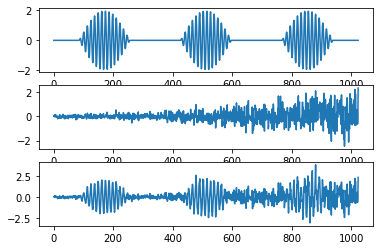

In [2]:
import emd
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 512
seconds = 2
time_vect = np.linspace(0, seconds, seconds*sample_rate)

# Create an amplitude modulated burst
am = -np.cos(3*np.pi*1*time_vect) * 2
am[am < 0] = 0
burst = am*np.sin(2*np.pi*42*time_vect)

# Create some noise with increasing amplitude
am = np.linspace(0, 1, sample_rate*seconds)**2 + .1
np.random.seed(42)
n = am * np.random.randn(sample_rate*seconds,)

# Signal is burst + noise
x = burst + n

# Quick summary figure
plt.figure()
plt.subplot(311)
plt.plot(burst)
plt.subplot(312)
plt.plot(n)
plt.subplot(313)
plt.plot(x)

When we run the above signal through the sifting method, the 42Hz bursting signal splits across 4 IMFS but this makes the analysis much harder. 

The dynamic noise causes the problem where the peaks and troughs of the burst distorted by the additive noise. All in all this leads to poor sifting results which can be seen below.

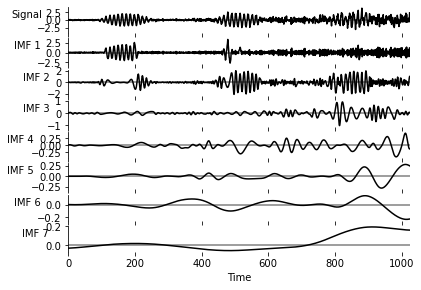

In [3]:
imf_opts = {'sd_thresh': 0.05}
imf = emd.sift.sift(burst+n, imf_opts=imf_opts)
emd.plotting.plot_imfs(imf)

There are two solutions mentioned, first one being ''noise-assisted sifting'' which tries to normalise the amount of noise through a signal by adding a small amount of white noise to the signal before sifting. We do this many times, creating an ensemble of sift processes each with a separate white noise added. The final set of IMFs is taken to be the average across the whole ensemble.

The second solution is ensemble sifting by using ``emd.sift.ensemble_sift``. It works similarly to ``emd.sift.sift`` with a few extra parameters. 

Below we test out the sift method with different values of ensembles. First we started with 5 and then it clearly could be better so we try 7 and we see it clearly can be improved so we finally try 25.

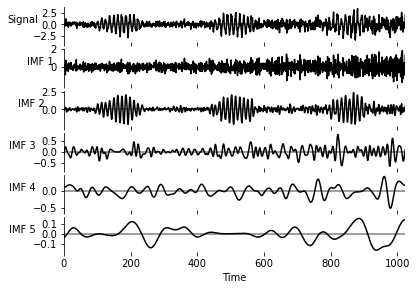

In [5]:
imf = emd.sift.ensemble_sift(burst+n, max_imfs=5, nensembles=5, nprocesses=6, ensemble_noise=1, imf_opts=imf_opts)
emd.plotting.plot_imfs(imf)

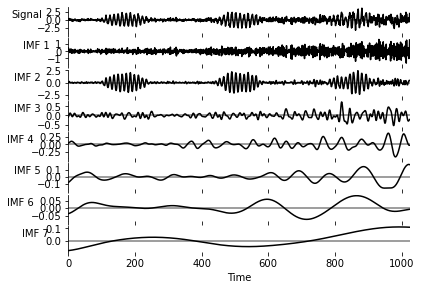

In [6]:
imf = emd.sift.ensemble_sift(burst+n, max_imfs=7, nensembles=24, nprocesses=6, ensemble_noise=1, imf_opts=imf_opts)
emd.plotting.plot_imfs(imf)

 Inputs samples (1024) is small for specified max_imfs (25) very likely that 9 or fewer imfs are returned


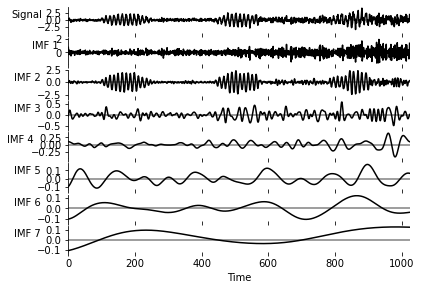

In [7]:
imf = emd.sift.ensemble_sift(burst+n, max_imfs=25, nensembles=24, nprocesses=6, ensemble_noise=1, imf_opts=imf_opts)
emd.plotting.plot_imfs(imf)